# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Import data

In [42]:
file_name = '/Users/wesamazaizeh/Desktop/Projects/halal_o_meter/src/features/feature_engineering/features_draft_1.pkl'
data_df = pd.read_pickle(file_name)
data_df.head()

,halal,halal_in_name,halal_review_percent,halal_relevant,halal_negation,halal_truck,creekstone,non_halal_relevant,halal_bacon
platform_id,,,,,,,,,
-6tSx9IXwt1btreBtcyZ0g,False,False,0.035503,False,False,False,False,True,False
-7Dq_NtTyd7WV-Nt1f-o9A,True,False,0.066667,False,False,False,False,False,False
-D-ye8DU5KndJ7mqBpKU1g,True,True,1.000000,False,False,False,False,False,False
-E5PfobEXNQ_WC8Qv2wGJA,True,True,0.380952,True,False,False,False,False,False
-GYT90fOCNjTbjCjj4wuiw,False,False,0.153846,False,False,True,False,False,False


# Decision Tree Baseline

In [43]:
X = data_df.drop('halal', axis=1)
y = data_df.halal

X.head()

,halal_in_name,halal_review_percent,halal_relevant,halal_negation,halal_truck,creekstone,non_halal_relevant,halal_bacon
platform_id,,,,,,,,
-6tSx9IXwt1btreBtcyZ0g,False,0.035503,False,False,False,False,True,False
-7Dq_NtTyd7WV-Nt1f-o9A,False,0.066667,False,False,False,False,False,False
-D-ye8DU5KndJ7mqBpKU1g,True,1.000000,False,False,False,False,False,False
-E5PfobEXNQ_WC8Qv2wGJA,True,0.380952,True,False,False,False,False,False
-GYT90fOCNjTbjCjj4wuiw,False,0.153846,False,False,True,False,False,False


Accuracy: 0.75
Confusion matrix: 
 [[ 21  55]
 [  8 168]]
Classification repot:
               precision    recall  f1-score   support

       False       0.72      0.28      0.40        76
        True       0.75      0.95      0.84       176

    accuracy                           0.75       252
   macro avg       0.74      0.62      0.62       252
weighted avg       0.74      0.75      0.71       252



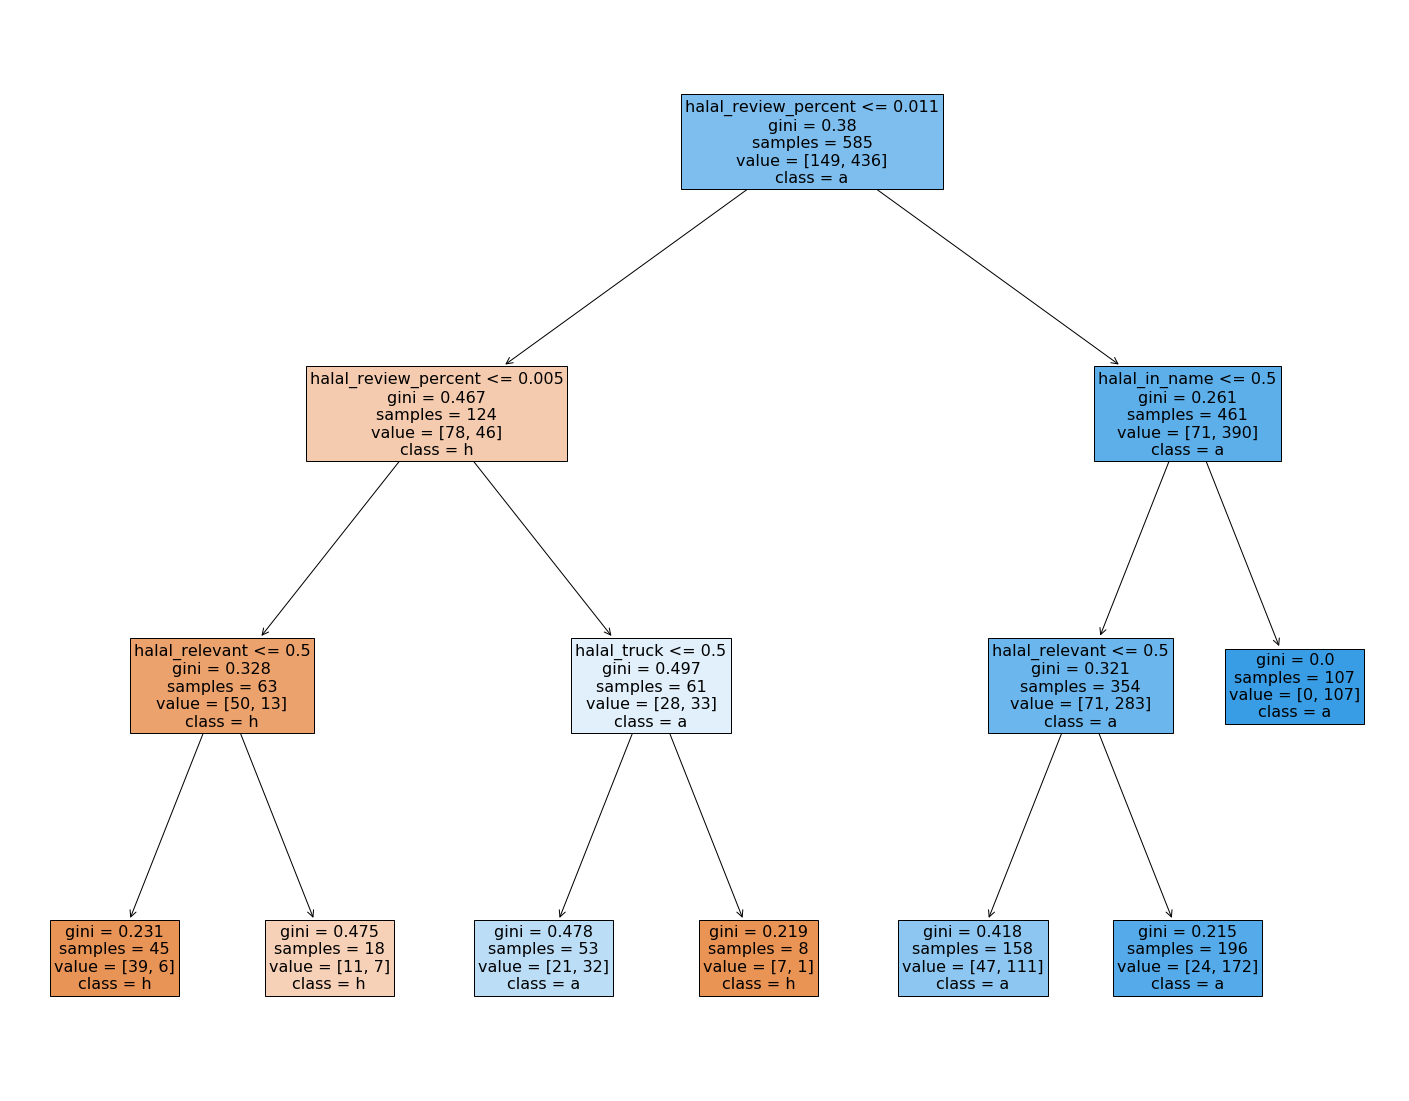

In [44]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# create and train model
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

# predict the response for test dataset
y_pred = dt.predict(X_test)

# visualize model result
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=X.columns, class_names=y.name, filled=True, fontsize=16)

# confusion matrix and classification report
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification repot:\n', classification_report(y_test, y_pred))

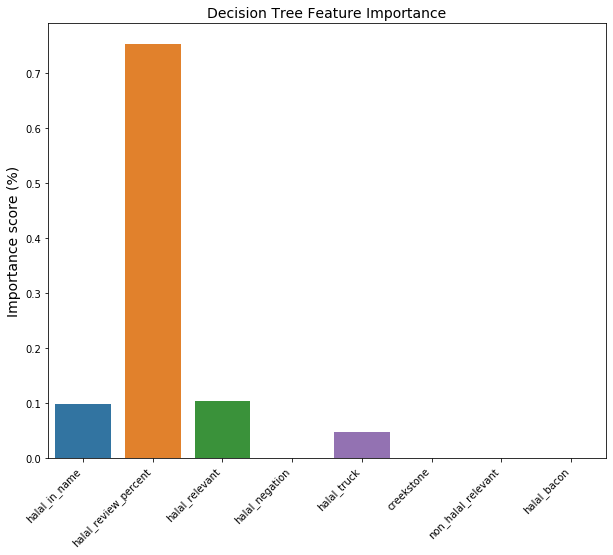

In [14]:
## Feature importance from Decision Tree
importances = dt.feature_importances_
features = X.columns

# plot
plt.figure(figsize=(10,8))
g = sns.barplot(x=features, y=importances)
g_labels = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Decision Tree Feature Importance', size=14)
g.set_ylabel('Importance score (%)', size=14)
plt.show()

# Try a regression model with count features instead of boolean features

In [39]:
file_name2 = '/Users/wesamazaizeh/Desktop/Projects/halal_o_meter/src/features/feature_engineering/features_draft_2.pkl'
data2_df = pd.read_pickle(file_name2)
data2_df.head()

,halal,halal_in_name,halal_review_percent,halal_relevant_count,halal_negation_count,halal_truck_count,non_halal_relevant_count,creekstone_count,hala_bacon_count
platform_id,,,,,,,,,
-6tSx9IXwt1btreBtcyZ0g,False,False,0.035503,0.0,0.0,0.0,11.0,0.0,0.0
-7Dq_NtTyd7WV-Nt1f-o9A,True,False,0.066667,0.0,0.0,0.0,0.0,0.0,0.0
-D-ye8DU5KndJ7mqBpKU1g,True,True,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
-E5PfobEXNQ_WC8Qv2wGJA,True,True,0.380952,3.0,0.0,0.0,0.0,0.0,0.0
-GYT90fOCNjTbjCjj4wuiw,False,False,0.153846,0.0,0.0,2.0,0.0,0.0,0.0


/Users/wesamazaizeh/miniconda3/envs/spacy_env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


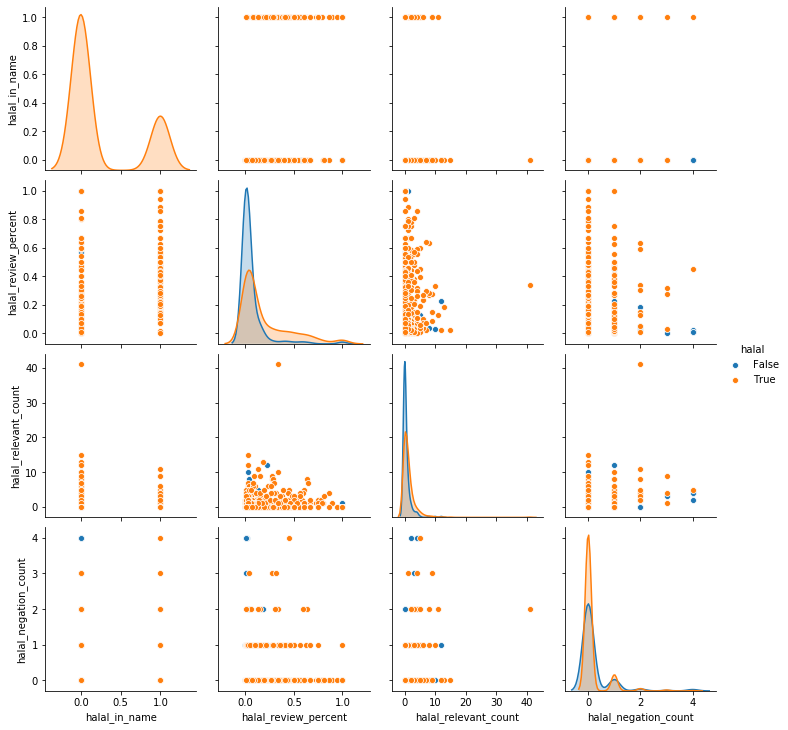

In [3]:
# what's the general distribution of these columns?
g = sns.pairplot(data2_df.iloc[:, :5], hue='halal')
plt.show()

In [176]:
data2_df.dtypes

halal                          bool
halal_in_name                  bool
halal_review_percent        float64
halal_relevant_count        float64
halal_negation_count        float64
halal_truck_count           float64
non_halal_relevant_count    float64
creekstone_count            float64
hala_bacon_count            float64
dtype: object

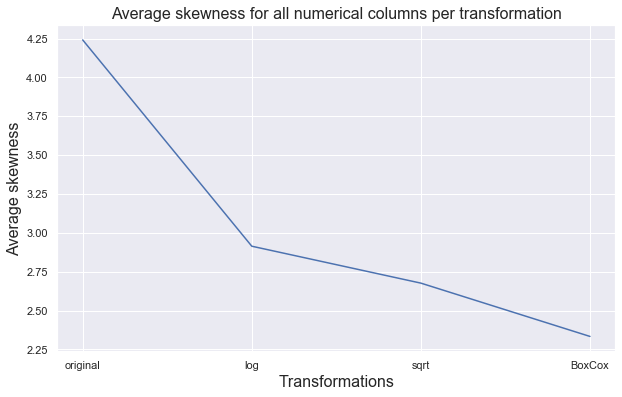

In [177]:
# almost all are skewed to zero
# check which transformation reduces skewness the most on avergae
from scipy import stats

transformations = ['original', 'log', 'sqrt', 'BoxCox']
og = []
log = []
sqrt = []
boxcox = []
skew_scores = []

for col in data2_df.iloc[:, 2:]:    
    og.append(data2_df['halal_negation_count'].skew())
    log.append(data2_df['halal_negation_count'].apply(lambda x: np.log(x+1)).skew())
    sqrt.append(data2_df['halal_negation_count'].apply(lambda x: np.sqrt(x)).skew())
    boxcox.append(pd.Series(stats.boxcox(data2_df['halal_negation_count']+1)[0]).skew())

skew_scores = [np.mean(og), np.mean(log), np.mean(sqrt), np.mean(boxcox)]
    
plt.figure(figsize=(10,6))
sns.lineplot(x=transformations, y=skew_scores, markers=True, dashes=False, sort=False)
plt.title('Average skewness for all numerical columns per transformation', size=16)
plt.xlabel('Transformations', size=16)
plt.ylabel('Average skewness', size=16)
plt.show()

/Users/wesamazaizeh/miniconda3/envs/spacy_env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


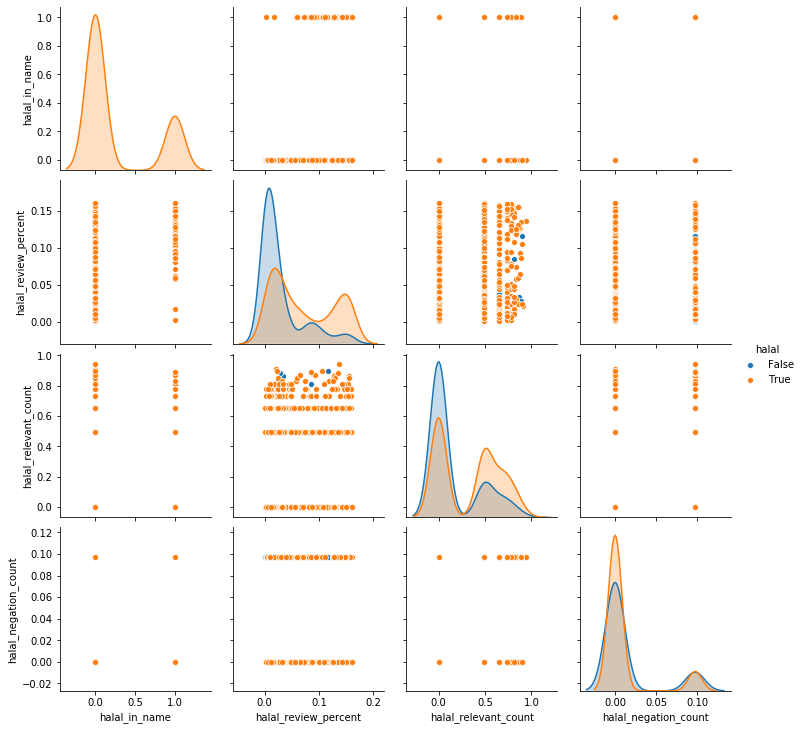

In [5]:
# apply boxcox to all columns
from scipy import stats

bc_data2_df = pd.DataFrame(columns = data2_df.columns)
bc_data2_df[['halal', 'halal_in_name']] = data2_df[['halal', 'halal_in_name']]
for col in data2_df.iloc[:, 2:]:
    bc_data2_df[col] = pd.Series(stats.boxcox(data2_df[col]+1)[0], index=data2_df.index)

g = sns.pairplot(bc_data2_df.iloc[:, :5], hue='halal')
plt.show()

In [40]:
# represent categorical data numerically
bc_data2_df['halal'] = data2_df['halal']*1
bc_data2_df['halal_in_name'] = data2_df['halal_in_name']*1

In [41]:
# features and target
X = bc_data2_df.drop('halal', axis=1)
y = bc_data2_df.halal

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# create and train model
regressor = LogisticRegression()  
regressor.fit(X_train, y_train)

# predict the response for test dataset
y_pred = regressor.predict(X_test)

# model accuracy, how often is the classifier correct?
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print('RMSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('R2: {:.4f}'.format(metrics.r2_score(y_test, y_pred)))


MAE: 0.3263
RMSE: 0.1589
R2: 0.2457


# Try classifying per review then classifying restaurants based on the average of their reviews

In [15]:
file_name3 = '/Users/wesamazaizeh/Desktop/Projects/halal_o_meter/src/features/feature_engineering/features_draft_3.pkl'
review_df = pd.read_pickle(file_name3)
review_df.head()

,halal,halal_in_name,halal_review_percent,halal_relevant,halal_negation,halal_truck,non_halal_relevant,non_halal_relevant_count,creekstone,halal_bacon,restaurant_id
0,True,False,0.010811,False,False,False,True,1,False,False,FdB6KDTEmX8HvomPwySAHg
1,True,False,0.010811,False,False,False,False,0,False,False,FdB6KDTEmX8HvomPwySAHg
2,True,False,0.061644,False,False,False,False,0,False,False,KPGZ6zr6lUX9YROjGcUbtw
3,True,False,0.061644,False,False,False,False,0,False,False,KPGZ6zr6lUX9YROjGcUbtw
4,True,False,0.061644,False,False,False,False,0,False,False,KPGZ6zr6lUX9YROjGcUbtw


In [16]:
# identify features and target
X = review_df.drop(['halal', 'restaurant_id'], axis=1)
y = review_df.halal

X.head()

,halal_in_name,halal_review_percent,halal_relevant,halal_negation,halal_truck,non_halal_relevant,non_halal_relevant_count,creekstone,halal_bacon
0,False,0.010811,False,False,False,True,1,False,False
1,False,0.010811,False,False,False,False,0,False,False
2,False,0.061644,False,False,False,False,0,False,False
3,False,0.061644,False,False,False,False,0,False,False
4,False,0.061644,False,False,False,False,0,False,False


Accuracy: 0.753968253968254
Classification repot:
               precision    recall  f1-score   support

       False       0.68      0.36      0.47        76
        True       0.77      0.93      0.84       176

    accuracy                           0.75       252
   macro avg       0.72      0.64      0.65       252
weighted avg       0.74      0.75      0.73       252



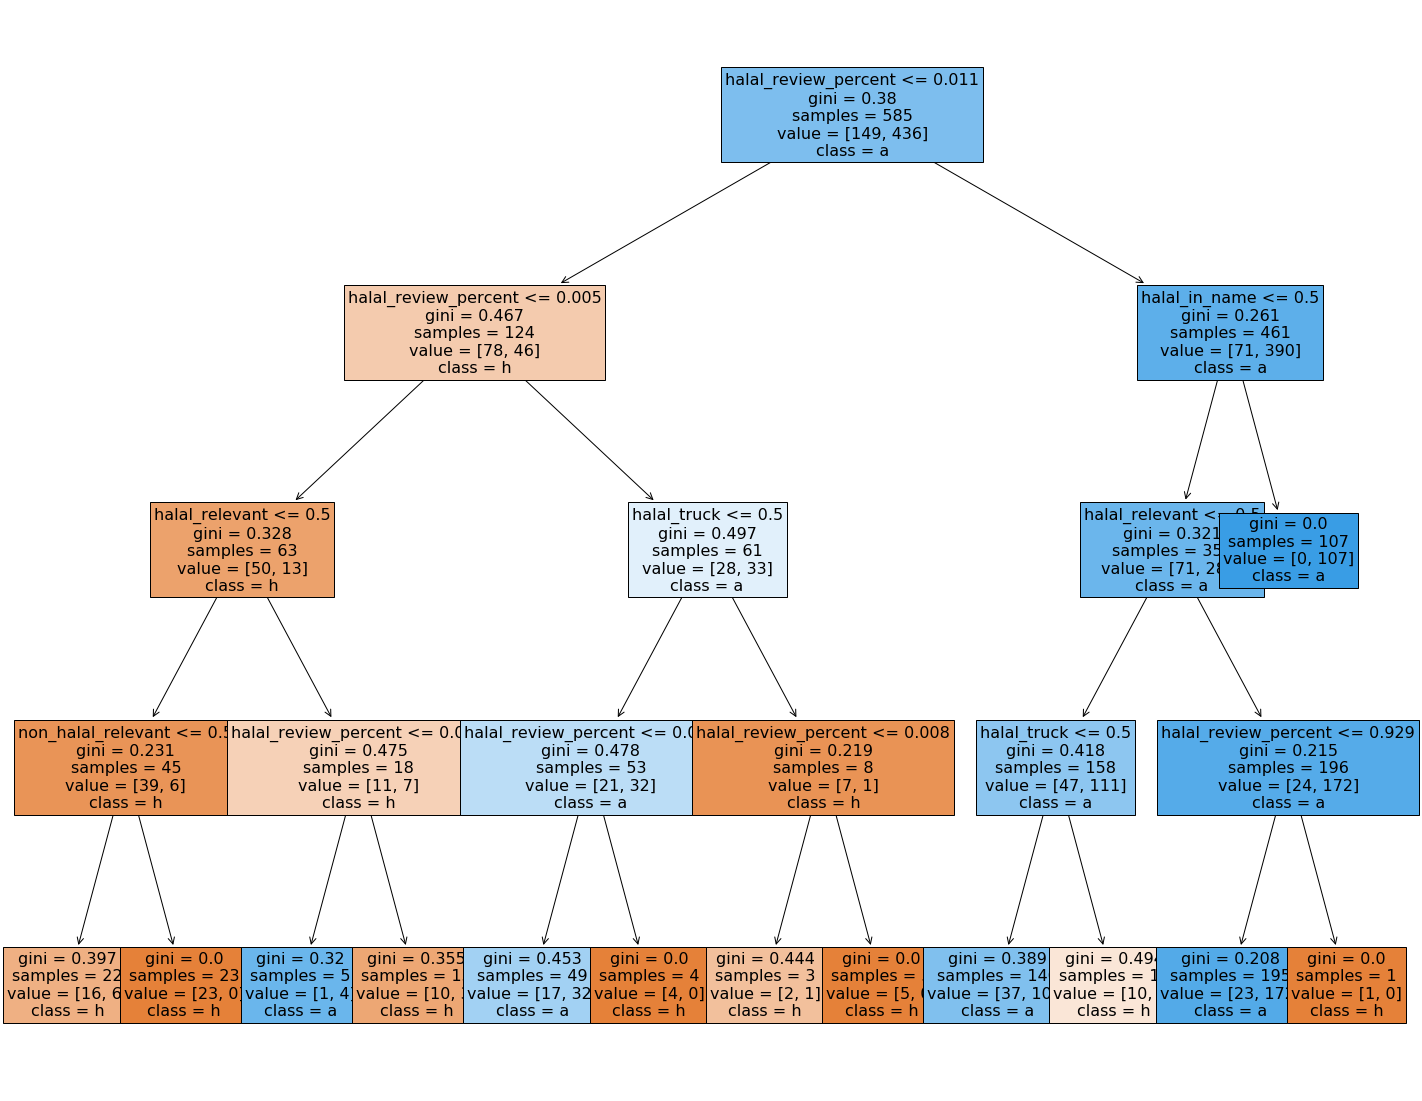

In [38]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# create and train model
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

# predict the response for test dataset
y_pred = dt.predict(X_test)

# model accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# visualize model result
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=X.columns, class_names=y.name, filled=True, fontsize=16)

# confusion matrix and classification report
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification repot:\n', classification_report(y_test, y_pred))

In [18]:
# average predictions per restaurant
review_df['pred_halal'] = dt.predict(X)
grouped_reviews_df = review_df.groupby('restaurant_id')[['halal', 'pred_halal']].apply(lambda x: np.sum(x)/len(x))
grouped_reviews_df['pred_halal'].value_counts()

1.0    729
0.0    108
Name: pred_halal, dtype: int64

- There is no variation in between reviews of the same restaurant?

In [19]:
'''
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
If you think about it for a moment, precision answers the following question: out of all the examples the
classifier labeled as positive, what fraction were correct? On the other hand, recall answers: out of all the
positive examples there were, what fraction did the classifier pick up?
'''
# # grouped avergaed data metrics
# precision = 587/ (587 + 142)
# recall = 587/ (587 + 25)
# f1 = 2*precision*recall/ (precision + recall)
# print('Precision: {:.2f}'.format(precision))
# print('Recall: {:.2f}'.format(recall))
# print('F1: {:.2f}'.format(f1))

'\n# precision = TP/(TP + FP)\n# recall = TP/(TP + FN)\nIf you think about it for a moment, precision answers the following question: out of all the examples the\nclassifier labeled as positive, what fraction were correct? On the other hand, recall answers: out of all the\npositive examples there were, what fraction did the classifier pick up?\n'

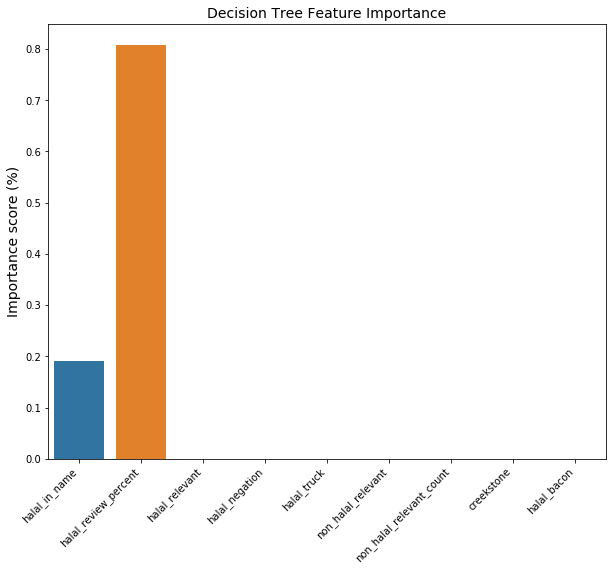

In [20]:
## Feature importance from Decision Tree
importances = dt.feature_importances_
features = X.columns

# plot
plt.figure(figsize=(10,8))
g = sns.barplot(x=features, y=importances)
g_labels = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Decision Tree Feature Importance', size=14)
g.set_ylabel('Importance score (%)', size=14)
plt.show()

# The model is performing better only bc the sample size is bigger but there is no added information in dividing the features per reviews isntead of per restaurant

Try:
    1. different models
    2. resampling

In [37]:
### 1. Different Models
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# restaurant data
X = data_df.drop('halal', axis=1)
y = data_df.halal
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# cross validate different models
models = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_micro': 'recall_macro'}
cv_scores = []
for model in models:
    cv_scores.append(cross_validate(model, 
                            X_train, y_train,
                            scoring = scoring,
                            cv = 3,
                            n_jobs = -1))
    
for score_list, model_name  in zip(cv_scores, ['DT', 'RF', 'LR']):
    print('\n', model_name)
    print('Accuracy: ', score_list['test_acc'].mean())
    print('Precision: ', score_list['test_prec_macro'].mean())
    print('Recall: ', score_list['test_rec_micro'].mean())


 DT
Accuracy:  0.7384615384615385
Precision:  0.6578938670512694
Recall:  0.6650919186758312

 RF
Accuracy:  0.7589743589743589
Precision:  0.6781804185094619
Recall:  0.6679783996735208

 LR
Accuracy:  0.7931623931623931
Precision:  0.7457301209423132
Recall:  0.6445105543398276


### There seems to be no significant different between the 3 models. Logistic regression has a higher precision score but recall is still a deficit in all cases.

In [31]:
''' 
Decision Tree are supposed to perform well on imbalanced data but let's see if correcting data imbalance will
improve the model
'''

for score in cv_scores:
    print(score)

{'fit_time': array([0.0115881 , 0.00951195, 0.01202989]), 'score_time': array([0.0082109 , 0.01313901, 0.01455522]), 'test_acc': array([0.7025641 , 0.75384615, 0.76923077]), 'test_prec_macro': array([0.60866013, 0.6791958 , 0.69964124]), 'test_rec_micro': array([0.61154599, 0.6837931 , 0.70724138])}
{'fit_time': array([0.38640499, 0.34021902, 0.39319301]), 'score_time': array([0.0344398 , 0.03504705, 0.03716826]), 'test_acc': array([0.72307692, 0.76923077, 0.78974359]), 'test_prec_macro': array([0.62224602, 0.69444444, 0.72400056]), 'test_rec_micro': array([0.61168577, 0.68103448, 0.72103448])}
{'fit_time': array([0.02468991, 0.02470708, 0.02708983]), 'score_time': array([0.01034498, 0.01082397, 0.00807595]), 'test_acc': array([0.77435897, 0.81538462, 0.78974359]), 'test_prec_macro': array([0.70607553, 0.78817365, 0.74294118]), 'test_rec_micro': array([0.6052558 , 0.68586207, 0.64241379])}
